### Fourier Transformation of Images

In [33]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from matplotlib import pyplot as plt
import cv2

###### FFT is a quick DFT Algorithm 
1. [Wikipedia link](https://en.wikipedia.org/wiki/Fast_Fourier_transform)
2. [Numpy Implementation](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
3. [OpenCv](https://opencv24-python-tutorials.readthedocs.io/en/stable/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#additional-resources)

Shape of Image (900, 900)


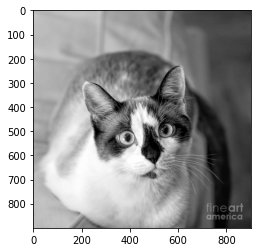

In [89]:
# Read Image 
img = cv2.imread('Images/Image1.jpg',0)

# Show Image 
plt.imshow(img,cmap = 'gray')
print("Shape of Image",img.shape)

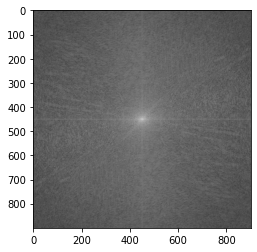

In [90]:
# Convert it into Fourier Transform
fourier_image = np.fft.fft2(img)

# DC should be shifted to Center 
fourier_image_shifted = np.fft.fftshift(fourier_image)

# Get Magnitude Spectrum to Plot the image 
magnitude_spectrum = 20*np.log(np.abs(fourier_image_shifted))
plt.imshow(magnitude_spectrum, cmap = 'gray')

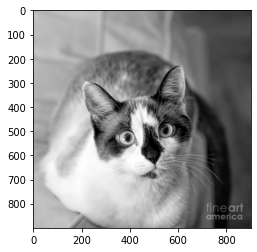

In [91]:
# Magnitude spectrum is used only for plotting , using fourier_image_shifted as the input for the inverse fourier transform

inverse_image_shifted = np.fft.ifftshift(fourier_image_shifted)

# Inverse Fourier Transform using np.ifft2
inverse_image = np.fft.ifft2(inverse_image_shifted)

# Get Spatial Image
spatial_image = (np.abs(inverse_image))

plt.imshow(spatial_image,cmap = 'gray')

In [92]:
def fouriertransform(image):
    # Convert it into Fourier Transform
    fourier_image = np.fft.fft2(image)
    
    # DC should be shifted to Center 
    fourier_image = np.fft.fftshift(fourier_image)
    
    return fourier_image

##### Lets Convert our fourier transform steps to function

In [93]:
def inverse_fouriertransform(fourier_image):
    
    # DC should be shifted to Center 
    fourier_image = np.fft.ifftshift(fourier_image)
    
    # Convert it back into Spatial Image
    spatial_image = np.fft.ifft2(fourier_image)

    return spatial_image

#### Examples of input transforms from Paper

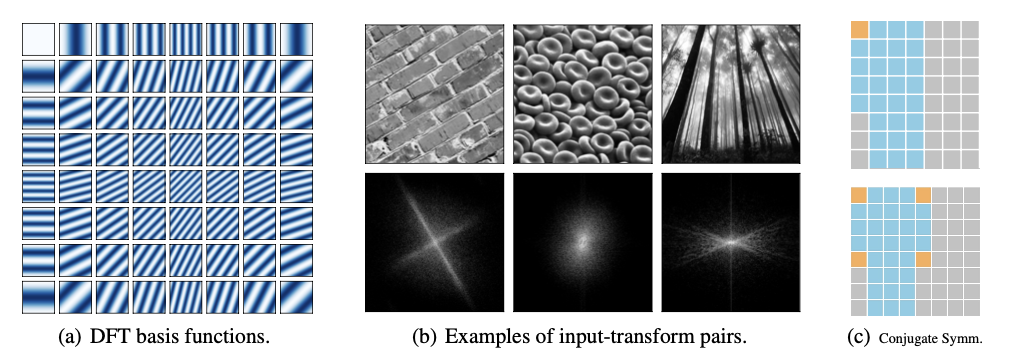

(270, 272)


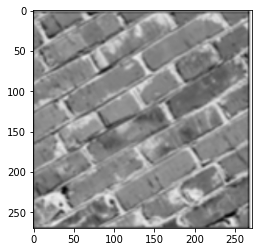

In [94]:
img = cv2.imread('Images/Paper1.png',0)
print(img.shape)
plt.imshow(img,cmap='gray')

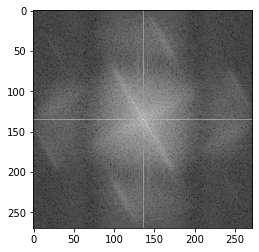

In [64]:
fourier_image = fouriertransform(img)
magnitude_spectrum = 20*np.log(np.abs(fourier_image))
plt.imshow(magnitude_spectrum, cmap = 'gray')

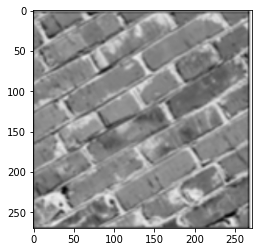

In [66]:
fourier_image= inverse_fouriertransform(fourier_image)
magnitude_spectrum = np.abs(fourier_image)
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [67]:
def tffouriertransform(image):
    # Convert it into Fourier Transform
    fourier_image = tf.signal.fft2d(image)

    # DC should be shifted to Center 
    fourier_image = tf.signal.fftshift(fourier_image)
    
    return fourier_image

def tfinverse_fouriertransform(fourier_image):
    
    # DC should be shifted to Center 
    fourier_image = tf.signal.ifftshift(fourier_image)
    
    # Convert it back into Spatial Image
    spatial_image = tf.signal.ifft2d(fourier_image)
    return spatial_image

In [77]:
%%timeit 
# img = cv2.imread('Images/Paper1.png',0)
# plt.subplot(131),plt.imshow(img,cmap='gray')

fourier_image = tffouriertransform(img)
magnitude_spectrum = 20*np.log(np.abs(fourier_image))
# # plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')

fourier_image= tfinverse_fouriertransform(fourier_image)
magnitude_spectrum = np.abs(fourier_image)
# plt.subplot(133),plt.imshow(magnitude_spectrum, cmap = 'gray')

3.37 ms ± 63.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [78]:
%%timeit 
# img = cv2.imread('Images/Paper1.png',0)
# plt.subplot(131),plt.imshow(img,cmap='gray')

fourier_image = fouriertransform(img)
magnitude_spectrum = 20*np.log(np.abs(fourier_image))
# plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')

fourier_image= inverse_fouriertransform(fourier_image)
magnitude_spectrum = np.abs(fourier_image)
# plt.subplot(133),plt.imshow(magnitude_spectrum, cmap = 'gray')

7.11 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f68ad573c88>)

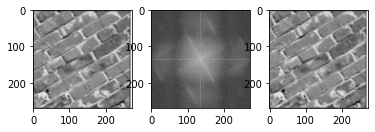

In [80]:
img = cv2.imread('Images/Paper1.png',0)
plt.subplot(131),plt.imshow(img,cmap='gray')

fourier_image = tffouriertransform(img)
magnitude_spectrum = 20*np.log(np.abs(fourier_image))
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')

fourier_image= tfinverse_fouriertransform(fourier_image)
magnitude_spectrum = np.abs(fourier_image)
plt.subplot(133),plt.imshow(magnitude_spectrum, cmap = 'gray')

In [96]:
# RBG Image 
img = cv2.imread('Images/Image1.jpg')

# RGB Image has 3 channels 
print(img.shape)

(900, 900, 3)


###### The Fourier Transform does not work on 3 Channel image as we can see below

/home/ecbm4040/envTF24/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f6c48181e10>)

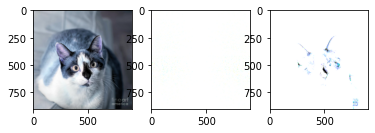

In [195]:
plt.subplot(131),plt.imshow(img)

fourier_image = tffouriertransform(img)
magnitude_spectrum = 20*np.log(np.abs(fourier_image))
plt.subplot(132),plt.imshow(magnitude_spectrum)

fourier_image= tfinverse_fouriertransform(fourier_image)
magnitude_spectrum = np.abs(fourier_image)
plt.subplot(133),plt.imshow(magnitude_spectrum)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f68baf68710>)

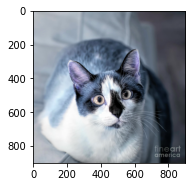

In [205]:
# Make Channels into 3 different images 

new_img = tf.transpose(img,perm=[2,0,1])
fourier_image = tffouriertransform(tf.cast(new_img, tf.complex64))
magnitude_spectrum = 20*np.log(np.abs(fourier_image))


fourier_image= tfinverse_fouriertransform(fourier_image)
fourier_image = tf.math.real(tf.transpose(fourier_image,perm=[1,2,0]))

# We need to normalize the channels data 
c_max = tf.reduce_max(fourier_image, axis=(0, 1))
c_min = tf.reduce_min(fourier_image, axis=(0, 1))
im_out = tf.divide(fourier_image - c_min,c_max - c_min)
        
plt.subplot(122),plt.imshow(im_out)